In [2]:
import sys
sys.path.append('..')

In [3]:
import planetengine
import modelscripts

In [17]:
import os

In [10]:
outputPath = '../data/tests'

In [22]:
MS98 = planetengine.frame.load_frame(outputPath, "pemod_anorgana-defrosts", loadStep = 'max')

Tar found - unarchiving...
Unarchived.
Building frame...
Making stamps...
Stamps made.
Doing stuff with the observer...
Observer stuff complete.
Loading interior frames...
Loaded 0 interior frames.
Initialising...
Initialisation complete!
Frame built!
Found checkpoint: 00010000
Loading checkpoint...
Loading substrate from disk: 
mesh
Loading var from disk: 
temperatureField
Checkpoint successfully loaded!
Building frame...
Making stamps...
Stamps made.
Doing stuff with the observer...
Observer stuff complete.
Loading interior frames...
Loaded 1 interior frames.
Initialising...
Mapping achieved at tolerance = 0.006006802353314534
Initialisation complete!
Frame built!
Found checkpoint: 00010000
Loading checkpoint...
Loading substrate from disk: 
mesh
Loading var from disk: 
temperatureField
Checkpoint successfully loaded!
Building frame...
Making stamps...
Stamps made.
Doing stuff with the observer...
Observer stuff complete.
Loading interior frames...
Loaded 1 interior frames.
Initialis

Archiving...
Making a local archive...
Deleting model directory...
Model directory deleted.
Archived!
Checkpoint successfully loaded!


In [18]:
MS98X = planetengine.frame.make_frame(
    modelscripts.MS98X_systemscript.build(res = 64, Ra = 1e7, tau = 1e6, heating = 0., aspect = 2),
    modelscripts.MS98X_observerscript.build(),
    initials = {
        'temperatureField': planetengine.initials.load.IC(
            os.path.join(outputPath, 'pemod_anorgana-defrosts'),
            'temperatureField',
            'max'
            ),
        'materialVar': planetengine.initials.extents.IC(
            (1, planetengine.shapes.trapezoid(
                longwidth = 0.3,
                lengthRatio = 0.8,
                thickness = 0.05
                ))
            )
        },
    outputPath = outputPath
    )

Tar found - unarchiving...
Unarchived.
Building frame...
Making stamps...
Stamps made.
Doing stuff with the observer...
Observer stuff complete.
Loading interior frames...
Loaded 0 interior frames.
Initialising...
Initialisation complete!
Frame built!
Found checkpoint: 00010000
Loading checkpoint...
Loading substrate from disk: 
mesh
Loading var from disk: 
temperatureField
Checkpoint successfully loaded!
Building frame...
Making stamps...
Stamps made.
Doing stuff with the observer...
Observer stuff complete.
Loading interior frames...
Loaded 1 interior frames.
Initialising...
Mapping achieved at tolerance = 0.006006802353314534
Initialisation complete!
Frame built!
Found checkpoint: 00010000
Loading checkpoint...
Loading substrate from disk: 
mesh
Loading var from disk: 
temperatureField
Checkpoint successfully loaded!
Building frame...
Making stamps...
Stamps made.
Doing stuff with the observer...
Observer stuff complete.
Loading interior frames...
Loaded 1 interior frames.
Initialis

Archiving...
Making a local archive...
Deleting model directory...
Model directory deleted.
Archived!
Checkpoint successfully loaded!
Making a new frame...
Making stamps...
Stamps made.
Building frame...
Making stamps...
Stamps made.
Doing stuff with the observer...
Observer stuff complete.
Loading interior frames...
Loaded 1 interior frames.
Initialising...
Mapping achieved at tolerance = 0.00037038951409555193
Initialisation complete!
Frame built!
Frame made.


Reporting...
Analysing...
Analysis complete!
avTemp 0.69
avVisc 2.4E+03
modeltime 0.0E+00
Nu 3.6
step 0
surfVRMS 10.54
VRMS 207.11
yielding 0%
fig



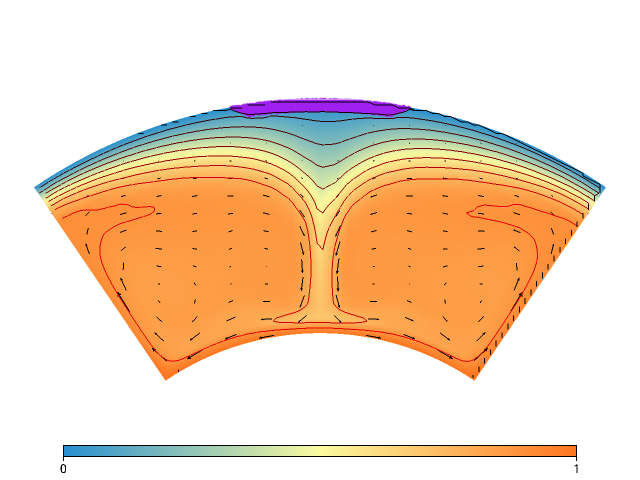

Reporting complete!


In [19]:
MS98X.report()

In [9]:
%%sh
umask 0000
mpirun -np 4 python runscript_001.py

	Global element size: 64x64
	Local offset of rank 0: 0x0
	Local range of rank 0: 32x32
	Global element size: 64x64x64
	Local offset of rank 0: 0x0x0
	Local range of rank 0: 64x32x32
	Global element size: 4x8
	Local offset of rank 0: 0x0
	Local range of rank 0: 4x2
Linear solver (22FJ6CXO__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 2.00987e-04 
  [1] SROpGenerator_SimpleCoarserLevel: time = 1.87635e-04 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.0004418 secs 
  RHS V Solve:            = 0.0007098 secs / 8 its
  Pressure Solve:         = 0.002305 secs / 6 its
  Final V Solve:          = 0.0003252 secs / 7 its

  Total BSSCR Linear solve time: 0.004936 seconds

Linear solver (22FJ6CXO__system-execute), solution time 5.311966e-03 (secs)
Linear solver (G8D6ZLBR__system-execute) 
Linear solver (G8D6ZLBR__system-execute), solution t

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [10]:
%%sh
umask 0000
mpirun -np 4 python runscript_002.py

	Global element size: 64x64
	Local offset of rank 0: 0x0
	Local range of rank 0: 32x32
	Global element size: 64x64x64
	Local offset of rank 0: 0x0x0
	Local range of rank 0: 64x32x32
	Global element size: 64x160
	Local offset of rank 0: 0x0
	Local range of rank 0: 64x40
	Global element size: 32x80
	Local offset of rank 0: 0x0
	Local range of rank 0: 32x20
	Global element size: 32x80
	Local offset of rank 0: 0x0
	Local range of rank 0: 32x20
	Global element size: 16x32
	Local offset of rank 0: 0x0
	Local range of rank 0: 16x8
	Global element size: 16x40
	Local offset of rank 0: 0x0
	Local range of rank 0: 16x10
	Global element size: 8x20
	Local offset of rank 0: 0x0
	Local range of rank 0: 8x5
	Global element size: 4x8
	Local offset of rank 0: 0x0
	Local range of rank 0: 4x2
Linear solver (DSWYD6SY__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 2.05040e-04 
  [1] SROp

In [27]:
import os

os.path.exists('/workspace/user_data/data/tests/dev/pemod_anisopodal-craftiest/inputs.txt')

True